<a href="https://colab.research.google.com/github/Computational-Tools-in-DS-G42/footballer-profiler-AI/blob/Zahed/player_profiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy._core.fromnumeric import shape
import numpy as np
import seaborn as sns



## **Data Import**:

In [239]:
#init_df = pd.read_csv("data2.csv", encoding="latin1", sep=",")
url = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/data.csv"
init_df = pd.read_csv(url, encoding="latin1", sep=",")
print("Shape" + str(init_df.shape))

Shape(71584, 38)


In [240]:
url2 = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/players.csv"
init_df2 = pd.read_csv(url2, encoding="latin1", sep=",")
print("Shape" + str(init_df2.shape))

Shape(32601, 23)


In [241]:
url3 = "https://raw.githubusercontent.com/Computational-Tools-in-DS-G42/datasets/main/extra_player_attributes.csv"
extra_att_df = pd.read_csv(url3, encoding="latin1", sep=",")
print("Shape" + str(extra_att_df.shape))

Shape(31771, 5)


## **Exploratory Data Analysis**


In [242]:
display(init_df.columns)


Index(['name', 'club', 'age', 'position', 'apps', 'mins', 'goals', 'assists',
       'yel', 'red', 'shots', 'ps%', 'aerials_won', 'motm', 'rating',
       'tackles', 'interceptions', 'fouls', 'offsides_won', 'clearances',
       'dribbled', 'blocks', 'own_goals', 'key_passes', 'dribblings', 'fouled',
       'offsides', 'dispossed', 'bad_controls', 'avg_passes', 'crosses',
       'long_passes', 'through_passes', 'league', 'season', 'fee', 'traded',
       'club_position'],
      dtype='object')

In [243]:
print('Info:')
init_df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71584 entries, 0 to 71583
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            71584 non-null  object 
 1   club            71584 non-null  object 
 2   age             71584 non-null  int64  
 3   position        71584 non-null  object 
 4   apps            71584 non-null  object 
 5   mins            71584 non-null  int64  
 6   goals           71584 non-null  object 
 7   assists         71584 non-null  object 
 8   yel             71584 non-null  object 
 9   red             71584 non-null  object 
 10  shots           71584 non-null  object 
 11  ps%             71584 non-null  object 
 12  aerials_won     71584 non-null  object 
 13  motm            71584 non-null  object 
 14  rating          71584 non-null  float64
 15  tackles         71528 non-null  object 
 16  interceptions   71528 non-null  object 
 17  fouls           71528 non

In [244]:
init_df['season'].unique().tolist()

['2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [245]:
init_df['position'].unique().tolist()

['FW',
 'M(CLR)',
 'D(C)',
 'M(C)',
 'Midfielder',
 'M(CL)',
 'M(R)',
 'M(CR)',
 'DMC',
 'D(CL)',
 'GK',
 'D(L)',
 'D(R)',
 'M(L)',
 'D(CLR)',
 'AM(L)',
 'M(LR)',
 'D(CR)',
 'AM(CLR)',
 'AM(C)',
 'AM(LR)',
 'AM(CL)',
 'AM(CR)',
 'Forward',
 'AM(R)',
 'Defender',
 'Goalkeeper',
 'midfielder',
 'D(LR)',
 'forward']

In [246]:
display(init_df.head(10))

,name,club,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded,club_position
0,Arjen Robben,Bayern,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.18,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0,1
1,Arjen Robben,Bayern,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.18,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0,1
2,Stefan Kieling,Leverkusen,26,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.79,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0,4
3,Stefan Kieling,Leverkusen,26,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.79,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0,4
4,Zvjezdan Misimovic,Wolfsburg,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.74,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,â¬8.50m,1,8
5,Zvjezdan Misimovic,Wolfsburg,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.74,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,â¬8.50m,1,8
6,Edin Dzeko,Wolfsburg,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.73,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0,8
7,Edin Dzeko,Wolfsburg,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.73,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0,8
8,Claudio Pizarro,Werder Bremen,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.63,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0,3
9,Claudio Pizarro,Werder Bremen,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.63,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0,3


In [247]:
#init_df = init_df.replace("-", np.nan)
#init_df['bad_controls'].isna().sum()

In [248]:
#display(init_df.head(10))

In [249]:
# Note that there might a character instead of Nan
init_df.isna().all()


,0
name,False
club,False
age,False
position,False
apps,False
mins,False
goals,False
assists,False
yel,False
red,False


## **Data Preprocessing**:


### Removing unnacesarry the columns & Filtering out players that played less than 90 mins.

In [250]:
# Removing unnacesarry the columns

print("Shape: " + str(init_df.shape))
#cols_to_drop = ["club", "motm", "rating", "offsides_won", "league",  "fee", "traded", "club_position"]
# TODO
cols_to_drop = ["club", "motm", "offsides_won", "league",  "fee", "traded", "club_position"]

df_clean = init_df.drop(columns=cols_to_drop)
print("Shape: " + str(df_clean.shape))

Shape: (71584, 38)
Shape: (71584, 31)


In [251]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
df_clean = df_clean[df_clean["mins"] >= 90]
print("After: " + str(df_clean["mins"].min()) + "mins")
print("Shape: " + str(df_clean.shape))


Before: 1mins
After: 90mins
Shape: (63786, 31)


In [252]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_clean.head(2)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010


###Removing duplicates

In [253]:
# Removing duplicates
print("Before: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))
df_clean = df_clean.drop_duplicates()
print("After: Duplicates: " + str(df_clean.duplicated().sum()) +
      ", Shape: " + str(df_clean.shape))


Before: Duplicates: 32015, Shape: (63786, 31)
After: Duplicates: 0, Shape: (31771, 31)


In [254]:
# Resets the ordering
df_clean = df_clean.reset_index(drop=True)
df_clean.head(5)

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010
3,Edin Dzeko,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,7.73,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010
4,Claudio Pizarro,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010


In [255]:
dupes = df_clean[df_clean.duplicated(subset=["name", "season"], keep=False)]
dupes_sorted = dupes.sort_values(by=["name", "season"])

print(f"Remaining duplicates (same name & same season): {len(dupes_sorted)}")
dupes_sorted.head(10)


Remaining duplicates (same name & same season): 2488


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season
21326,Aaron Lennon,28,M(LR),12(2),1072,2,-,2,-,0.5,78,0.2,6.81,1.9,0.7,0.8,0.7,1.1,-,-,1.1,0.6,1.4,0.1,1.1,1,23.4,0.3,0.7,0.1,2014/2015
21507,Aaron Lennon,28,M(LR),3(6),276,-,2,1,-,0.2,85.2,-,6.42,1.1,0.3,0.4,0.2,0.2,-,-,1,0.2,0.3,-,0.7,0.2,12,0.3,0.1,0.1,2014/2015
22879,Aaron Lennon,31,M(LR),13(1),1125,-,2,2,-,0.7,70.8,0.5,6.58,1.4,0.6,0.7,0.6,1.3,0.4,-,0.5,0.7,0.9,0.1,1.6,0.6,19.6,0.4,0.4,-,2017/2018
22973,Aaron Lennon,31,M(LR),9(6),795,-,-,-,-,0.3,69.1,0.3,6.36,1.1,0.7,0.7,0.5,1.1,0.1,-,0.3,0.3,0.5,-,0.7,0.7,12.9,0.1,0.2,-,2017/2018
5108,Aaron Martin,24,M(L),3(2),261,-,-,-,-,0.2,73.5,0.2,6.23,0.6,0.4,0.8,0.4,0.4,-,-,0.6,0.6,-,-,0.4,0.6,22.6,0.8,1.4,-,2020/2021
11348,Aaron Martin,24,M(L),17(2),1540,-,3,1,-,0.3,82.3,0.8,6.58,1.8,0.7,1.3,1.8,1.2,0.2,-,0.3,0.9,0.8,0.2,0.4,0.7,35.4,0.2,1.1,-,2020/2021
15403,Abdelhamid El Kaoutari,26,D(CL),7(1),644,-,-,-,-,0.3,78,1,6.67,0.9,2.3,0.8,3.6,0.4,0.8,-,0.3,0.3,1,-,0.3,0.4,35.8,0.1,2.8,0.1,2015/2016
28187,Abdelhamid El Kaoutari,26,D(CL),7,630,1,-,2,-,0.1,82.7,0.9,7.06,3.1,2.6,0.4,2.9,0.9,0.7,-,0.3,0.6,0.7,-,0.4,0.3,36.4,-,2,-,2015/2016
6954,Abdelkader Ghezzal,28,FW,9(7),854,2,2,1,-,1.3,72.4,0.8,6.66,0.5,0.9,1.3,0.6,0.1,0.1,-,0.5,0.7,0.8,0.8,0.7,0.9,15.4,0.3,0.4,0.1,2011/2012
26427,Abdelkader Ghezzal,28,FW,10(3),758,-,-,4,-,0.5,74.3,1.1,6.34,0.9,0.8,1.8,1.6,0.6,0.2,-,0.7,0.3,0.8,0.1,1.9,1.3,18.8,0.5,1.4,0.1,2011/2012


###Adding height and foot attributes


In [256]:
display(extra_att_df.head(10))

,name,matched_name,match_score,height,preferred_foot
0,Arjen Robben,arjen robben,100.000000,180.0,left
1,Stefan Kieling,stefan kiealing,96.551724,191.0,right
2,Zvjezdan Misimovic,zvjezdan misimovic,100.000000,179.0,both
3,Edin Dzeko,NaN,0.000000,NaN,NaN
4,Claudio Pizarro,claudio pizarro,100.000000,184.0,right
5,Paolo Guerrero,NaN,0.000000,NaN,NaN
6,Mesut Ozil,mesut azil,90.000000,180.0,left
7,Naldo,naldo,100.000000,198.0,right
8,Toni Kroos,toni kroos,100.000000,183.0,right
9,Raffael,raffael,100.000000,174.0,right


In [257]:
print(df_clean.shape)
print(extra_att_df.shape)

(31771, 31)
(31771, 5)


In [258]:
(df_clean['name'] == extra_att_df['name']).all()


np.True_

In [259]:
df_clean['height'] = extra_att_df['height'].values
df_clean['foot'] = extra_att_df['preferred_foot'].values


In [260]:
display(df_clean.head(5))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,right
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,both
3,Edin Dzeko,24,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,7.73,0.5,0.1,1.9,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,2009/2010,NaN,NaN
4,Claudio Pizarro,32,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,right


Missing items: 1922


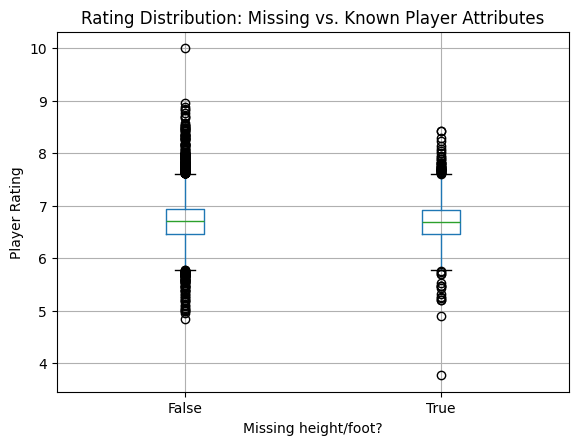

In [261]:

# Analysis of the players that do not have either "foot" or "height"
missing_players = df_clean[df_clean['height'].isna() | df_clean['foot'].isna()]

missing_players = missing_players.drop_duplicates(subset=['name'])

print("Missing items: " + str(missing_players.shape[0]))

#df_clean['missing_info'] = df_clean['name'].isin(missing_players['name'])
df_copy = df_clean.copy()
df_copy['missing_info'] = df_copy['name'].isin(missing_players['name'])


df_copy.boxplot(column='rating', by='missing_info')
plt.title("Rating Distribution: Missing vs. Known Player Attributes")
plt.suptitle("")
plt.xlabel("Missing height/foot?")
plt.ylabel("Player Rating")
plt.show()


In [262]:
display(df_clean.head(1))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left


In [263]:
# Removing players that do not have either "height" or "foot" attribute

before = df_clean.shape[0]
df_clean = df_clean.dropna(subset=['height', 'foot'])
df_clean = df_clean.reset_index(drop=True)

print(f"Removed {before - df_clean.shape[0]} players")

#df_clean[["name", "height", "foot"]].head(5)

Removed 5715 players


In [264]:
df_clean[["name", "height", "foot"]].head(10)


,name,height,foot
0,Arjen Robben,180.0,left
1,Stefan Kieling,191.0,right
2,Zvjezdan Misimovic,179.0,both
3,Claudio Pizarro,184.0,right
4,Mesut Ozil,180.0,left
5,Naldo,198.0,right
6,Toni Kroos,183.0,right
7,Raffael,174.0,right
8,Nuri Sahin,180.0,left
9,Lucas Barrios,189.0,right


### Filtering out (again)

In [265]:
#Filtering out players that played less than 90 mins
print("Before: " + str(df_clean["mins"].min()) + "mins")
val1 = df_clean.shape[0]
df_clean = df_clean[df_clean["mins"] >= 180]
print("After: " + str(df_clean["mins"].min()) + "mins")
print(f"Removed players: {val1 - df_clean.shape[0]}")

Before: 90mins
After: 180mins
Removed players: 1706


### Removing substitute data & Cleaning up duplicate positions.



In [266]:
# Removing substitute data
df_clean['apps'] = df_clean['apps'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Renaming column
df_clean = df_clean.rename(columns={'dispossed': 'poss_losses'})

display(df_clean.head(5))


,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot
0,Arjen Robben,26,FW,18,1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,left
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,right
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,both
3,Claudio Pizarro,32,FW,23,2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,right
4,Mesut Ozil,22,M(CLR),29,2601,9,13,2,-,2.2,82.5,0.1,7.62,0.7,0.8,0.7,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,2009/2010,180.0,left


In [267]:
# Cleaning up duplicate positions

df_clean['position'] = df_clean['position'].replace({
    'Goalkeeper': 'GK',
    'Forward': 'FW',
    'forward': 'FW',
    'Midfielder': 'M',
    'midfielder': 'M',
    'Defender': 'D'
})

df_clean['position'].unique().tolist()

['FW',
 'M(CLR)',
 'D(C)',
 'M(C)',
 'M(CL)',
 'M(R)',
 'M(CR)',
 'DMC',
 'D(CL)',
 'GK',
 'D(L)',
 'D(R)',
 'M(L)',
 'D(CLR)',
 'M(LR)',
 'D(CR)',
 'AM(C)',
 'AM(L)',
 'AM(CL)',
 'M',
 'D',
 'AM(CLR)',
 'AM(LR)',
 'AM(CR)',
 'D(LR)',
 'AM(R)']

### Encoding features

In [268]:
df_clean["foot"].unique().tolist()

['left', 'right', 'both']

In [269]:
df_clean = pd.get_dummies(df_clean, columns=['foot'], prefix='foot', dtype=int)

In [270]:
display(df_clean.head(5))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot_both,foot_left,foot_right
0,Arjen Robben,26,FW,18,1779,16,6,1,-,3.4,80.2,0.4,8.18,0.6,0.5,0.9,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,2009/2010,180.0,0,1,0
1,Stefan Kieling,26,FW,33,2924,21,5,3,-,3,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,2009/2010,191.0,0,0,1
2,Zvjezdan Misimovic,28,FW,31,2768,10,13,7,-,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,2009/2010,179.0,1,0,0
3,Claudio Pizarro,32,FW,23,2130,16,2,4,-,2.6,75.5,0.4,7.63,1,0.7,2,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,2009/2010,184.0,0,0,1
4,Mesut Ozil,22,M(CLR),29,2601,9,13,2,-,2.2,82.5,0.1,7.62,0.7,0.8,0.7,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,2009/2010,180.0,0,1,0


### Converting columns into float


In [271]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24350 entries, 0 to 26052
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            24350 non-null  object 
 1   age             24350 non-null  int64  
 2   position        24350 non-null  object 
 3   apps            24350 non-null  object 
 4   mins            24350 non-null  int64  
 5   goals           24350 non-null  object 
 6   assists         24350 non-null  object 
 7   yel             24350 non-null  object 
 8   red             24350 non-null  object 
 9   shots           24350 non-null  object 
 10  ps%             24350 non-null  object 
 11  aerials_won     24350 non-null  object 
 12  rating          24350 non-null  float64
 13  tackles         24341 non-null  object 
 14  interceptions   24341 non-null  object 
 15  fouls           24341 non-null  object 
 16  clearances      24341 non-null  object 
 17  dribbled        24341 non-null  obje

In [272]:
# Converting columns into float

cols = ['age','apps', 'mins', 'goals', 'assists', 'yel',
       'red', 'shots', 'ps%', 'aerials_won', 'tackles', 'interceptions',
       'fouls', 'clearances', 'dribbled', 'blocks', 'own_goals', 'key_passes',
       'dribblings', 'fouled', 'offsides', 'poss_losses', 'bad_controls',
       'avg_passes', 'crosses', 'long_passes', 'through_passes', "foot_both",
        "foot_left", "foot_right"]

for curr in cols:
  df_clean[curr] = pd.to_numeric(df_clean[curr], errors='coerce').fillna(0)

df_clean[cols] = df_clean[cols].astype(float)

In [273]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24350 entries, 0 to 26052
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            24350 non-null  object 
 1   age             24350 non-null  float64
 2   position        24350 non-null  object 
 3   apps            24350 non-null  float64
 4   mins            24350 non-null  float64
 5   goals           24350 non-null  float64
 6   assists         24350 non-null  float64
 7   yel             24350 non-null  float64
 8   red             24350 non-null  float64
 9   shots           24350 non-null  float64
 10  ps%             24350 non-null  float64
 11  aerials_won     24350 non-null  float64
 12  rating          24350 non-null  float64
 13  tackles         24350 non-null  float64
 14  interceptions   24350 non-null  float64
 15  fouls           24350 non-null  float64
 16  clearances      24350 non-null  float64
 17  dribbled        24350 non-null  floa

### Converting attributes per game to per 90 minnutes

In [274]:
display(df_clean.head(4))

,name,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,rating,tackles,interceptions,fouls,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,poss_losses,bad_controls,avg_passes,crosses,long_passes,through_passes,season,height,foot_both,foot_left,foot_right
0,Arjen Robben,26.0,FW,18.0,1779.0,16.0,6.0,1.0,0.0,3.4,80.2,0.4,8.18,0.6,0.5,0.9,0.0,0.7,0.0,0.0,1.8,4.0,2.2,0.3,2.1,0.0,34.3,1.5,2.0,0.2,2009/2010,180.0,0.0,1.0,0.0
1,Stefan Kieling,26.0,FW,33.0,2924.0,21.0,5.0,3.0,0.0,3.0,72.4,2.1,7.79,1.2,0.7,2.5,0.3,0.5,0.1,0.0,1.6,1.1,3.1,1.8,2.2,0.0,32.5,0.2,0.4,0.1,2009/2010,191.0,0.0,0.0,1.0
2,Zvjezdan Misimovic,28.0,FW,31.0,2768.0,10.0,13.0,7.0,0.0,2.4,77.5,0.2,7.74,1.9,0.6,1.5,0.2,1.2,0.1,0.0,3.3,1.5,2.1,0.3,3.1,0.0,51.1,2.5,5.7,0.5,2009/2010,179.0,1.0,0.0,0.0
3,Claudio Pizarro,32.0,FW,23.0,2130.0,16.0,2.0,4.0,0.0,2.6,75.5,0.4,7.63,1.0,0.7,2.0,0.7,0.4,0.2,0.0,1.3,1.2,1.2,1.4,3.1,0.0,24.2,0.1,0.8,0.0,2009/2010,184.0,0.0,0.0,1.0


In [275]:
# Converting attributes "goals" and "assists" to per 90 minutes.

df_clean['goals_p90'] = df_clean['goals'] / (df_clean['mins'] / 90)
df_clean['assists_p90'] = df_clean['assists'] / (df_clean['mins'] / 90)

df_clean = df_clean.drop(columns=["goals", "assists"])

In [276]:
# Converting per-game attributes to per 90 minnutes.

cols = ["yel", "red", "shots", "aerials_won", "tackles",  "interceptions",
        "fouls", "clearances", "dribbled", "blocks", "own_goals", "key_passes",
        "dribblings", "fouled",  "offsides", "poss_losses", "bad_controls",
        "avg_passes", "crosses", "long_passes", "through_passes"]


for curr in cols:
    total_mins = df_clean["mins"]
    total_val = df_clean[curr] * df_clean["apps"]
    df_clean[curr + "_p90"] = total_val / ( total_mins / 90)


df_clean = df_clean.drop(columns=cols)


In [277]:
display(df_clean.head(10))

,name,age,position,apps,mins,ps%,rating,season,height,foot_both,foot_left,foot_right,goals_p90,assists_p90,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90
0,Arjen Robben,26.0,FW,18.0,1779.0,80.2,8.18,2009/2010,180.0,0.0,1.0,0.0,0.809444,0.303541,0.910624,0.0,3.096121,0.364250,0.546374,0.455312,0.819562,0.000000,0.637437,0.000000,0.0,1.639123,3.642496,2.003373,0.273187,1.912310,0.0,31.234401,1.365936,1.821248,0.182125
1,Stefan Kieling,26.0,FW,33.0,2924.0,72.4,7.79,2009/2010,191.0,0.0,0.0,1.0,0.646375,0.153899,3.047196,0.0,3.047196,2.133037,1.218878,0.711012,2.539330,0.304720,0.507866,0.101573,0.0,1.625171,1.117305,3.148769,1.828317,2.234610,0.0,33.011286,0.203146,0.406293,0.101573
2,Zvjezdan Misimovic,28.0,FW,31.0,2768.0,77.5,7.74,2009/2010,179.0,1.0,0.0,0.0,0.325145,0.422688,7.055636,0.0,2.419075,0.201590,1.915101,0.604769,1.511922,0.201590,1.209538,0.100795,0.0,3.326228,1.511922,2.116691,0.302384,3.124639,0.0,51.506142,2.519870,5.745303,0.503974
3,Claudio Pizarro,32.0,FW,23.0,2130.0,75.5,7.63,2009/2010,184.0,0.0,0.0,1.0,0.676056,0.084507,3.887324,0.0,2.526761,0.388732,0.971831,0.680282,1.943662,0.680282,0.388732,0.194366,0.0,1.263380,1.166197,1.166197,1.360563,3.012676,0.0,23.518310,0.097183,0.777465,0.000000
4,Mesut Ozil,22.0,M(CLR),29.0,2601.0,82.5,7.62,2009/2010,180.0,0.0,1.0,0.0,0.311419,0.449827,2.006920,0.0,2.207612,0.100346,0.702422,0.802768,0.702422,0.000000,0.702422,0.000000,0.0,3.010381,2.307958,1.404844,0.501730,2.910035,0.0,35.020761,2.107266,1.404844,0.100346
5,Naldo,28.0,D(C),31.0,2762.0,83.1,7.59,2009/2010,198.0,0.0,0.0,1.0,0.162925,0.065170,5.050688,0.0,2.020275,1.313179,2.727371,3.737509,1.414193,3.333454,0.707096,0.606083,0.0,0.404055,0.707096,1.010138,0.101014,0.303041,0.0,51.314989,0.000000,3.737509,0.000000
6,Toni Kroos,20.0,M(C),26.0,2360.0,82.2,7.59,2009/2010,183.0,0.0,0.0,1.0,0.343220,0.343220,5.949153,0.0,2.181356,0.198305,1.388136,0.991525,0.892373,0.297458,0.793220,0.099153,0.0,2.379661,1.189831,2.181356,0.099153,0.892373,0.0,36.884746,1.487288,2.776271,0.297458
7,Raffael,25.0,FW,30.0,2654.0,84.1,7.56,2009/2010,174.0,0.0,0.0,1.0,0.237378,0.135644,9.155991,0.0,2.441598,0.305200,1.932931,1.424265,1.220799,0.305200,1.119066,0.000000,0.0,2.339864,3.051997,2.441598,0.305200,2.950264,0.0,40.184627,1.627732,2.339864,0.101733
8,Nuri Sahin,22.0,M(C),33.0,2904.0,76.5,7.51,2009/2010,180.0,0.0,1.0,0.0,0.123967,0.216942,5.113636,0.0,1.431818,0.511364,3.477273,2.556818,1.534091,1.022727,1.840909,0.204545,0.0,2.556818,0.818182,1.022727,0.204545,0.818182,0.0,56.454545,1.534091,5.931818,0.306818
9,Lucas Barrios,26.0,FW,30.0,2623.0,69.3,7.45,2009/2010,189.0,0.0,0.0,1.0,0.651925,0.137247,6.176134,0.0,3.088067,1.338162,0.926420,0.514678,2.161647,1.235227,0.617613,0.000000,0.0,1.338162,0.926420,1.646969,1.441098,2.264583,0.0,21.719405,0.102936,0.720549,0.102936


### Finding highly correlated features and deleting them

In [278]:
display(df_clean.columns)

Index(['name', 'age', 'position', 'apps', 'mins', 'ps%', 'rating', 'season',
       'height', 'foot_both', 'foot_left', 'foot_right', 'goals_p90',
       'assists_p90', 'yel_p90', 'red_p90', 'shots_p90', 'aerials_won_p90',
       'tackles_p90', 'interceptions_p90', 'fouls_p90', 'clearances_p90',
       'dribbled_p90', 'blocks_p90', 'own_goals_p90', 'key_passes_p90',
       'dribblings_p90', 'fouled_p90', 'offsides_p90', 'poss_losses_p90',
       'bad_controls_p90', 'avg_passes_p90', 'crosses_p90', 'long_passes_p90',
       'through_passes_p90'],
      dtype='object')

In [279]:
numeric_df = df_clean.select_dtypes(include='number')
corr = numeric_df.corr()

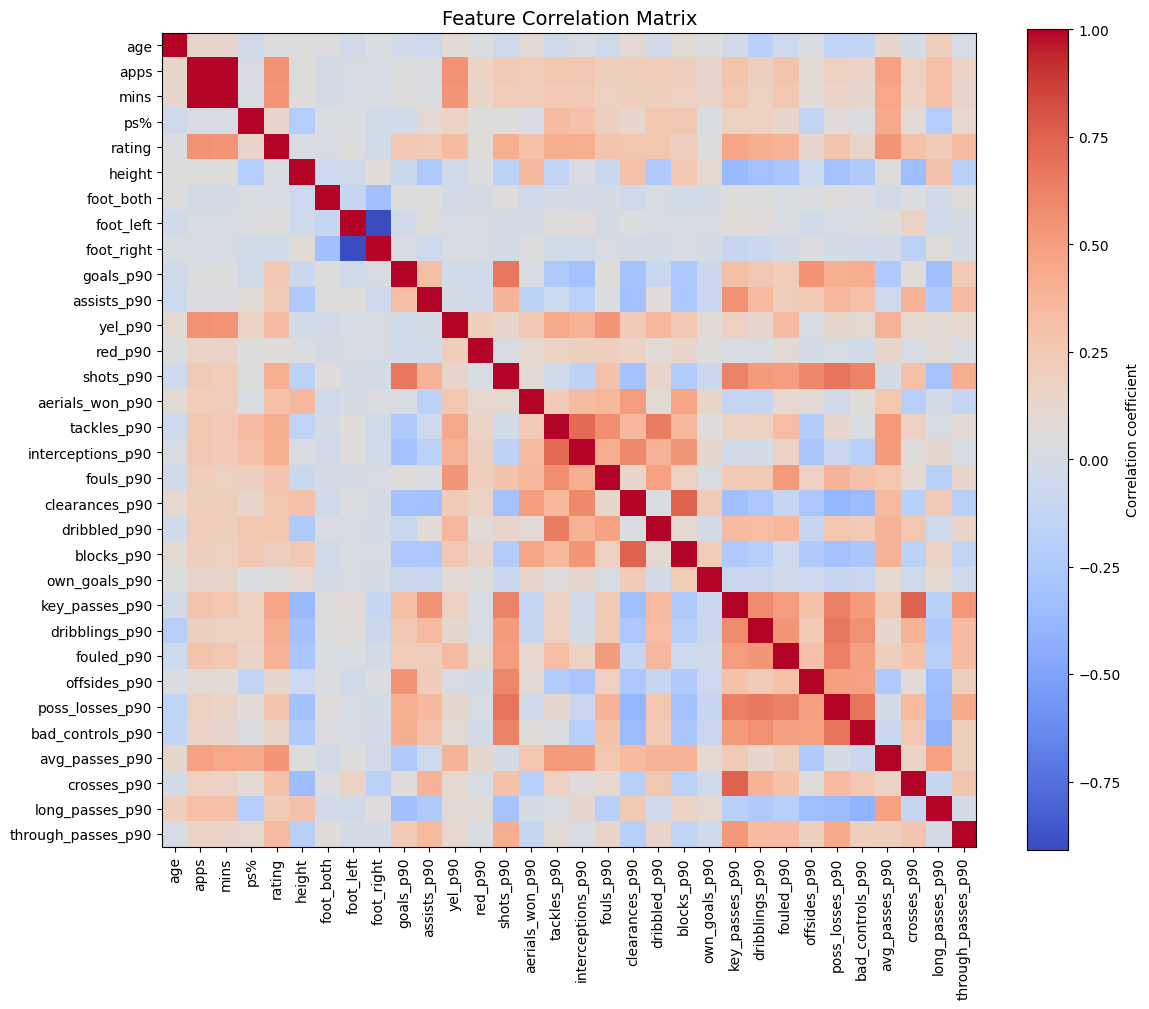

In [280]:

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation coefficient')
plt.title("Feature Correlation Matrix", fontsize=14)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


Highly correlated features: ['crosses_p90', 'foot_left', 'key_passes_p90', 'apps', 'mins', 'foot_right']


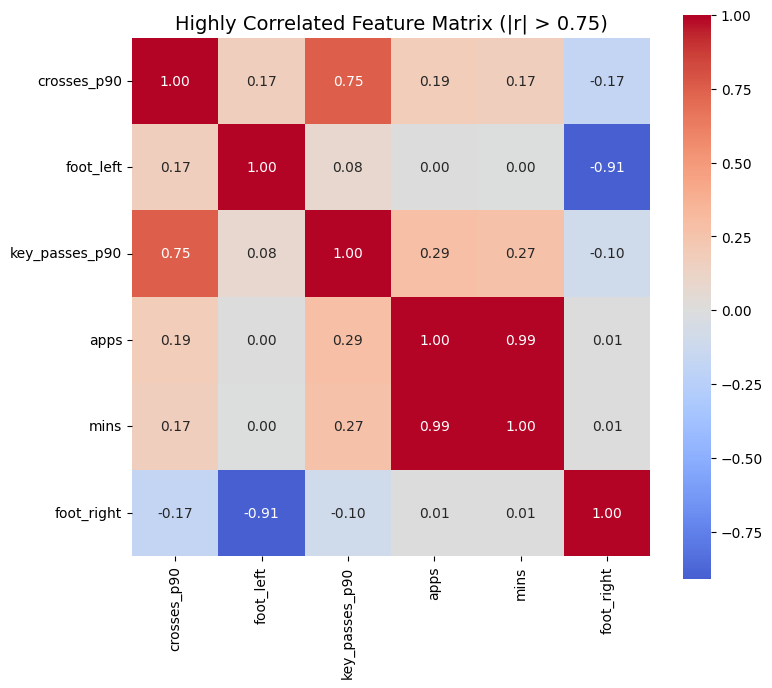

In [281]:
threshold = 0.75
high_corr_pairs = corr.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs) > threshold) & (abs(high_corr_pairs) < 1)]

# Extract relevant features
high_corr_features = list(
    set(high_corr_pairs.index.get_level_values(0)).union(
        set(high_corr_pairs.index.get_level_values(1))
    )
)

print("Highly correlated features:", high_corr_features)

# Subset correlation matrix
corr_subset = corr.loc[high_corr_features, high_corr_features]

# Plot with Seaborn
plt.figure(figsize=(8, 7))
sns.heatmap(corr_subset, cmap='coolwarm', annot=True, fmt=".2f", center=0, square=True)
plt.title(f"Highly Correlated Feature Matrix (|r| > {threshold})", fontsize=14)
plt.tight_layout()
plt.show()

In [282]:
# Deleting highly correlated features

df_clean = df_clean.drop(columns=["apps"])

In [283]:
display(df_clean.head(2))

,name,age,position,mins,ps%,rating,season,height,foot_both,foot_left,foot_right,goals_p90,assists_p90,yel_p90,red_p90,shots_p90,aerials_won_p90,tackles_p90,interceptions_p90,fouls_p90,clearances_p90,dribbled_p90,blocks_p90,own_goals_p90,key_passes_p90,dribblings_p90,fouled_p90,offsides_p90,poss_losses_p90,bad_controls_p90,avg_passes_p90,crosses_p90,long_passes_p90,through_passes_p90
0,Arjen Robben,26.0,FW,1779.0,80.2,8.18,2009/2010,180.0,0.0,1.0,0.0,0.809444,0.303541,0.910624,0.0,3.096121,0.364250,0.546374,0.455312,0.819562,0.00000,0.637437,0.000000,0.0,1.639123,3.642496,2.003373,0.273187,1.91231,0.0,31.234401,1.365936,1.821248,0.182125
1,Stefan Kieling,26.0,FW,2924.0,72.4,7.79,2009/2010,191.0,0.0,0.0,1.0,0.646375,0.153899,3.047196,0.0,3.047196,2.133037,1.218878,0.711012,2.539330,0.30472,0.507866,0.101573,0.0,1.625171,1.117305,3.148769,1.828317,2.23461,0.0,33.011286,0.203146,0.406293,0.101573


### Data processing (continued)



In [284]:
#cols_to_drop2 = ["name", "position", "apps", "season", "mins"]
#df2 = df.drop(columns=cols_to_drop2)
#list(df2.columns)

In [285]:
df_clean.shape

(24350, 34)

In [286]:
# Split data

df_train, df_test = train_test_split(df_clean, test_size=0.02, random_state=42)

print("Shape train: " + str(df_train.shape[0]))
print("Shape test: " + str(df_test.shape[0]))

Shape train: 23863
Shape test: 487


In [287]:

exclude_cols = ["name", "position", "season", "rating", "mins"]
X = df_train.drop(columns=exclude_cols)


In [288]:
print(X.shape)
X.info()


(23863, 29)
<class 'pandas.core.frame.DataFrame'>
Index: 23863 entries, 4951 to 25296
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 23863 non-null  float64
 1   ps%                 23863 non-null  float64
 2   height              23863 non-null  float64
 3   foot_both           23863 non-null  float64
 4   foot_left           23863 non-null  float64
 5   foot_right          23863 non-null  float64
 6   goals_p90           23863 non-null  float64
 7   assists_p90         23863 non-null  float64
 8   yel_p90             23863 non-null  float64
 9   red_p90             23863 non-null  float64
 10  shots_p90           23863 non-null  float64
 11  aerials_won_p90     23863 non-null  float64
 12  tackles_p90         23863 non-null  float64
 13  interceptions_p90   23863 non-null  float64
 14  fouls_p90           23863 non-null  float64
 15  clearances_p90      23863 non-null  float64

In [289]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [290]:
#display(df_train_scaled.head(100))
print(X_scaled[:5])  # first 5 rows

# Every feature should have a mean of ≈0
print("\nTrain means:", X_scaled.mean(axis=0))

# Every feature should have a standard deviation of 1
print("\nTrain stds :", X_scaled.std(axis=0))


[[ 1.17078155e+00 -3.96856577e-01  2.62187989e-01 -1.95213975e-01
  -5.66203680e-01  6.22790383e-01  1.56286871e+00  4.05787688e-01
  -9.34034561e-01 -4.03121514e-01 -9.24659356e-01 -1.02397064e+00
  -1.37538276e+00 -1.18777409e+00 -1.53844166e+00 -8.62822065e-01
  -1.15689346e+00 -8.11234109e-01 -2.42304812e-01 -8.73379069e-01
  -8.88573818e-01 -1.28058077e+00 -1.51307578e-01 -9.17209572e-01
  -1.16532570e+00 -1.82816550e+00 -7.08737765e-01 -9.06233300e-01
   8.77508724e-02]
 [ 6.93997386e-01 -1.11977092e+00  1.08206103e-01 -1.95213975e-01
   1.76614889e+00 -1.60567669e+00  2.64140200e+00 -7.34549987e-01
  -1.11547002e+00 -4.03121514e-01  2.55733614e-02 -5.49147261e-01
  -1.09515673e+00 -1.10139484e+00 -9.62466200e-01 -8.76253965e-01
  -6.65819818e-01 -8.11234109e-01 -2.42304812e-01 -5.55515077e-01
  -4.64300622e-01 -9.07245728e-01  3.59216150e-01 -1.71370319e-01
   4.25532965e-02 -1.57142088e+00  9.96860073e-03 -8.60063720e-01
  -4.66936877e-01]
 [ 9.32389469e-01  1.07023429e+00  5.7

## **Training**:


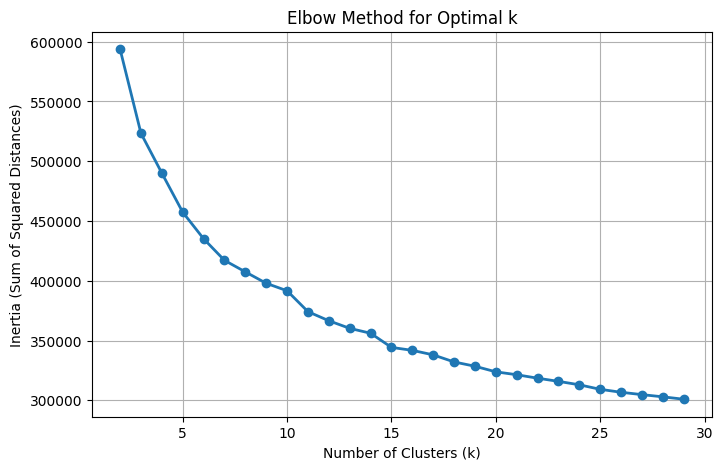

In [291]:
inertias = []
K = range(2, 30)  # test cluster numbers from 2 to 15

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'o-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [292]:

kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(X_scaled)




KMeans(n_clusters=11, random_state=42)

In [293]:
#display(df_train.head(20))

In [294]:

df_train['cluster'] = kmeans.labels_

In [295]:
df_train['cluster'].value_counts().sort_index()



,count
cluster,
0,1218
1,3483
2,1702
3,1752
4,986
5,2434
6,3468
7,2703
8,2309


In [296]:
group2 = df_train[df_train["cluster"] == 2][["name", "position", "cluster"]]
group2["position"].value_counts(normalize=True) * 100



,proportion
position,
FW,92.773208
M(CLR),1.116334
M(LR),0.763807
M(R),0.646298
AM(L),0.646298
M(C),0.646298
AM(C),0.587544
AM(CLR),0.470035
M(CR),0.352526


In [300]:
display(group2.head(10))

,name,position,cluster
18179,Bakary Sako,FW,2
4183,Ishak Belfodil,FW,2
6860,Federico Piovaccari,FW,2
16893,Brown Ideye,FW,2
1017,Maximilian Arnold,M(CR),2
15841,Gervinho,FW,2
2146,Artur Sobiech,FW,2
10997,Toifilou Maoulida,M(R),2
19494,Aaron Connolly,FW,2
6661,Luciano Vietto,FW,2


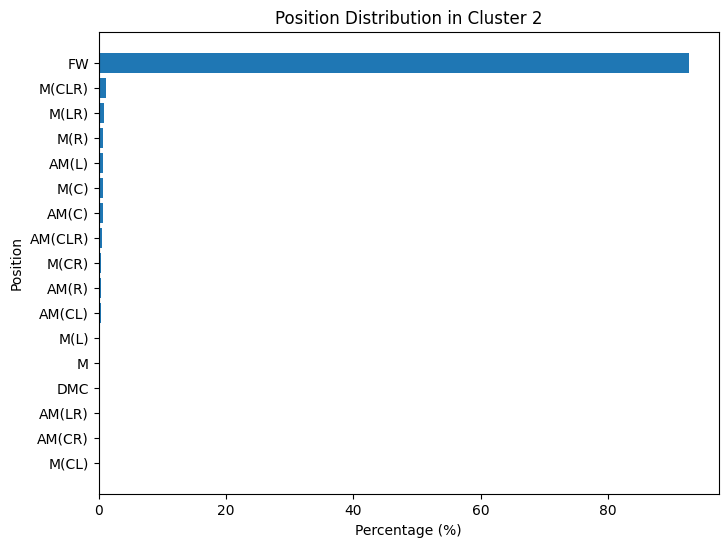

In [298]:

group2_percentages = (
    group2["position"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("proportion")
    .reset_index()
    .rename(columns={"index": "position"})
)

plt.figure(figsize=(8, 6))
plt.barh(group2_percentages["position"], group2_percentages["proportion"])
plt.xlabel("Percentage (%)")
plt.ylabel("Position")
plt.title("Position Distribution in Cluster 2")
plt.gca().invert_yaxis()  # so the largest is on top
plt.show()


In [299]:
df_clusters = df_train.groupby("cluster")["position"].value_counts(normalize=True).unstack().fillna(0)


In [303]:
# df_clusters is your heatmap-style DataFrame (cluster x position)
# Each cell = proportion (e.g., 0.42 means 42%)

for cluster_id, row in df_clusters.iterrows():
    print(f"\nCluster {cluster_id}")
    top3 = row.nlargest(3) * 100  # convert to percentages
    for position, pct in top3.items():
        print(f"  {position}: {pct:.2f}%")



Cluster 0
  FW: 97.62%
  AM(C): 0.33%
  AM(L): 0.33%

Cluster 1
  D(C): 65.95%
  D(CR): 11.74%
  DMC: 8.61%

Cluster 2
  FW: 92.77%
  M(CLR): 1.12%
  M(LR): 0.76%

Cluster 3
  GK: 99.77%
  D(C): 0.23%
  AM(C): 0.00%

Cluster 4
  FW: 51.12%
  M(CLR): 14.20%
  M(C): 12.17%

Cluster 5
  FW: 42.60%
  M(CLR): 15.24%
  AM(CLR): 6.82%

Cluster 6
  M(C): 20.30%
  M(R): 18.69%
  DMC: 17.99%

Cluster 7
  FW: 37.85%
  M(C): 9.10%
  M(CLR): 7.07%

Cluster 8
  M(C): 39.58%
  DMC: 22.17%
  M(R): 10.35%

Cluster 9
  M(L): 37.47%
  D(CL): 9.45%
  D(L): 9.42%

Cluster 10
  FW: 32.63%
  M(CLR): 10.09%
  M(C): 7.85%


In [302]:
df_clusters

position,AM(C),AM(CL),AM(CLR),AM(CR),AM(L),AM(LR),AM(R),D,D(C),D(CL),D(CLR),D(CR),D(L),D(LR),D(R),DMC,FW,GK,M,M(C),M(CL),M(CLR),M(CR),M(L),M(LR),M(R)
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.003284,0.002463,0.000821,0.000000,0.003284,0.001642,0.000821,0.000000,0.000821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.976190,0.000000,0.000000,0.001642,0.000821,0.003284,0.000821,0.002463,0.000821,0.000821
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002871,0.659489,0.064312,0.024691,0.117428,0.002297,0.003158,0.002584,0.086133,0.000000,0.000000,0.000000,0.018375,0.000000,0.000000,0.001148,0.003732,0.001148,0.012633
2,0.005875,0.002938,0.004700,0.002350,0.006463,0.002350,0.003525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002350,0.927732,0.000000,0.002350,0.006463,0.001763,0.011163,0.003525,0.002350,0.007638,0.006463
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.008114,0.019270,0.051724,0.003043,0.006085,0.002028,0.000000,0.000000,0.001014,0.000000,0.000000,0.000000,0.001014,0.000000,0.005071,0.010142,0.511156,0.000000,0.000000,0.121704,0.039554,0.141988,0.030426,0.020284,0.015213,0.012170
5,0.014790,0.020953,0.068200,0.011093,0.008628,0.022597,0.008217,0.000000,0.000411,0.000000,0.000000,0.000000,0.002054,0.000000,0.003287,0.015201,0.426048,0.000000,0.002465,0.067790,0.031635,0.152424,0.040263,0.012325,0.049302,0.042317
6,0.005190,0.001153,0.001442,0.001730,0.000577,0.000000,0.000000,0.003172,0.069204,0.005190,0.033449,0.039792,0.005190,0.028547,0.056517,0.179931,0.015859,0.000000,0.003460,0.202999,0.016724,0.040081,0.049020,0.013264,0.040657,0.186851
7,0.020348,0.013688,0.024417,0.011099,0.012949,0.026267,0.014428,0.011839,0.027377,0.001110,0.002590,0.007399,0.007399,0.004070,0.011099,0.062893,0.378468,0.021458,0.024047,0.091010,0.019238,0.070662,0.032186,0.028487,0.034406,0.041065
8,0.004331,0.000866,0.003898,0.000866,0.000000,0.000000,0.000866,0.001299,0.012126,0.004331,0.012993,0.015591,0.001299,0.010394,0.028151,0.221741,0.014292,0.000000,0.001299,0.395842,0.037246,0.042876,0.059333,0.014725,0.012126,0.103508


In [313]:
clusters_per_line = 5
# Create text blocks for each cluster
blocks = []
for cluster_id, row in df_clusters.iterrows():
    top3 = row.nlargest(3) * 100
    lines = [f"Cluster {cluster_id}"] + [f"  {pos}: {pct:.2f}%" for pos, pct in top3.items()]
    block = "\n".join(lines)
    blocks.append(block)

# Padding width for alignment
max_width = max(len(block.split("\n")[0]) for block in blocks) + 10

# Print horizontally formatted clusters
for i in range(0, len(blocks), clusters_per_line):
    row_blocks = blocks[i:i + clusters_per_line]

    # Split into lines per block and pad each line for alignment
    split_blocks = [b.split("\n") for b in row_blocks]
    max_lines = max(len(b) for b in split_blocks)
    for line_idx in range(max_lines):
        line_parts = []
        for block in split_blocks:
            if line_idx < len(block):
                line_parts.append(block[line_idx].ljust(max_width))
            else:
                line_parts.append("".ljust(max_width))
        print("".join(line_parts))
    print()



Cluster 0           Cluster 1           Cluster 2           Cluster 3           Cluster 4           
  FW: 97.62%          D(C): 65.95%        FW: 92.77%          GK: 99.77%          FW: 51.12%        
  AM(C): 0.33%        D(CR): 11.74%       M(CLR): 1.12%       D(C): 0.23%         M(CLR): 14.20%    
  AM(L): 0.33%        DMC: 8.61%          M(LR): 0.76%        AM(C): 0.00%        M(C): 12.17%      

Cluster 5           Cluster 6           Cluster 7           Cluster 8           Cluster 9           
  FW: 42.60%          M(C): 20.30%        FW: 37.85%          M(C): 39.58%        M(L): 37.47%      
  M(CLR): 15.24%      M(R): 18.69%        M(C): 9.10%         DMC: 22.17%         D(CL): 9.45%      
  AM(CLR): 6.82%      DMC: 17.99%         M(CLR): 7.07%       M(R): 10.35%        D(L): 9.42%       

Cluster 10          
  FW: 32.63%        
  M(CLR): 10.09%    
  M(C): 7.85%       



In [301]:
#display(df_train[["name", "position", "cluster"]].head(120))

In [ ]:
'cluster' in df_train.columns
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30182 entries, 25614 to 23654
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                30182 non-null  object 
 1   age                 30182 non-null  float64
 2   position            30182 non-null  object 
 3   apps                30182 non-null  float64
 4   mins                30182 non-null  float64
 5   goals               30182 non-null  float64
 6   assists             30182 non-null  float64
 7   ps%                 30182 non-null  float64
 8   season              30182 non-null  object 
 9   yel_p90             30182 non-null  float64
 10  red_p90             30182 non-null  float64
 11  shots_p90           30182 non-null  float64
 12  aerials_won_p90     30182 non-null  float64
 13  tackles_p90         30182 non-null  float64
 14  interceptions_p90   30182 non-null  float64
 15  fouls_p90           30182 non-null  float64
 16  clear

In [ ]:
position_distribution = df_train.groupby('cluster')['position'].value_counts(normalize=True).unstack().fillna(0)
display(position_distribution.round(2))


position,AM(C),AM(CL),AM(CLR),AM(CR),AM(L),AM(LR),AM(R),D,D(C),D(CL),D(CLR),D(CR),D(L),D(LR),D(R),DMC,FW,GK,M,M(C),M(CL),M(CLR),M(CR),M(L),M(LR),M(R)
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.64,0.07,0.02,0.11,0.01,0.00,0.00,0.09,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.01
1,0.01,0.01,0.04,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.04,0.19,0.00,0.00,0.15,0.06,0.16,0.05,0.13,0.05,0.07
2,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.23,0.00,0.01,0.34,0.07,0.10,0.07,0.02,0.01,0.01
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.18,0.05,0.03,0.05,0.04,0.02,0.05,0.15,0.01,0.00,0.01,0.13,0.02,0.01,0.02,0.08,0.02,0.09
4,0.02,0.01,0.02,0.01,0.01,0.02,0.01,0.02,0.03,0.00,0.00,0.00,0.01,0.00,0.01,0.05,0.43,0.08,0.05,0.08,0.01,0.03,0.02,0.03,0.02,0.02
5,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00
6,0.01,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.00,0.00,0.06,0.02,0.09,0.00,0.00,0.00,0.01
7,0.01,0.02,0.06,0.01,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.51,0.00,0.00,0.05,0.02,0.13,0.03,0.03,0.04,0.02
8,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.22,0.01,0.00,0.01,0.44,0.05,0.05,0.08,0.04,0.01,0.05
